In [7]:
# Base Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly as py
import datetime
import mpl_toolkits
import networkx as nx
import nxviz as nv
import plotly.express as px
import janitor
import warnings

from mpl_toolkits.basemap import Basemap
from networkx.drawing.nx_agraph import graphviz_layout
from nxviz import ArcPlot
from nxviz import annotate
from nxviz import CircosPlot

warnings.filterwarnings('ignore')

In [2]:
# Read files to dataframes
data=pd.read_csv('Maersk_Final.csv')
maersk_ports=pd.read_csv('Maersk_Ports.csv')

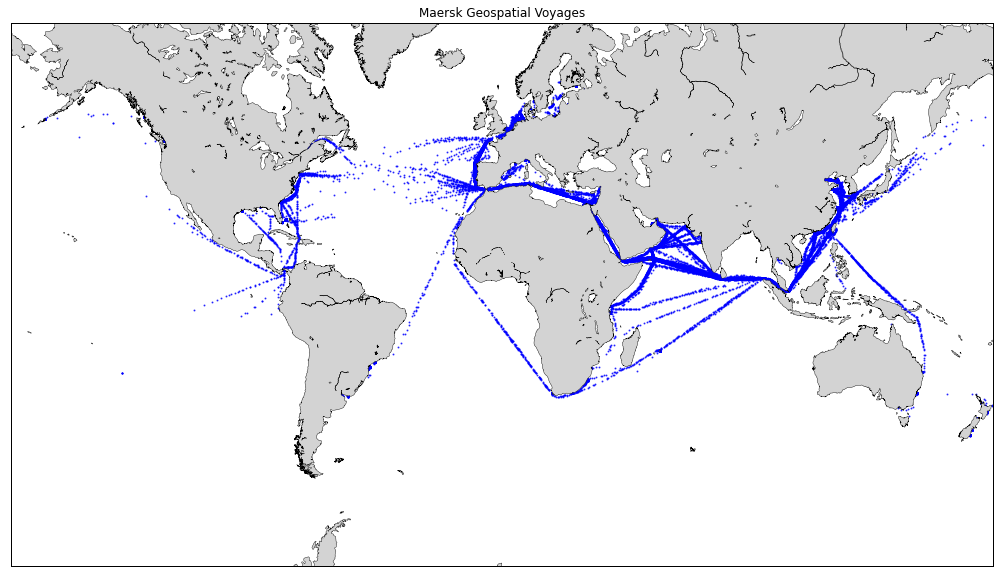

In [3]:
# Maersk Trajectory Extraction (59 Vessels)
minlon = -179
minlat = -70
maxlon = 179
maxlat = 70
lat0 = (maxlat+minlat)/2
lon0 = (maxlon+minlon)/2
lat1 = (maxlat+minlat)/2-20

fig,ax=plt.subplots(figsize=(20,10))
plt.title('Maersk Geospatial Voyages')

m = Basemap(llcrnrlon=minlon,llcrnrlat=minlat,urcrnrlon=maxlon,urcrnrlat=maxlat,rsphere=(6378137.00,6356752.3142),resolution='l',projection='merc',lat_0=lat0,lon_0=lon0,lat_ts = lat1)
m.drawmapboundary(fill_color='white')
m.drawcoastlines(color='black', linewidth=0.4)
m.fillcontinents(color='lightgrey',lake_color='white')
x, y = m(data['longitude'].values,data['latitude'].values)
m.scatter(x,y,1, c='b', marker='o', alpha=0.7)

In [4]:
# Filter by a ship
maersk_ports_by_imo = maersk_ports.query('imo==9778818')

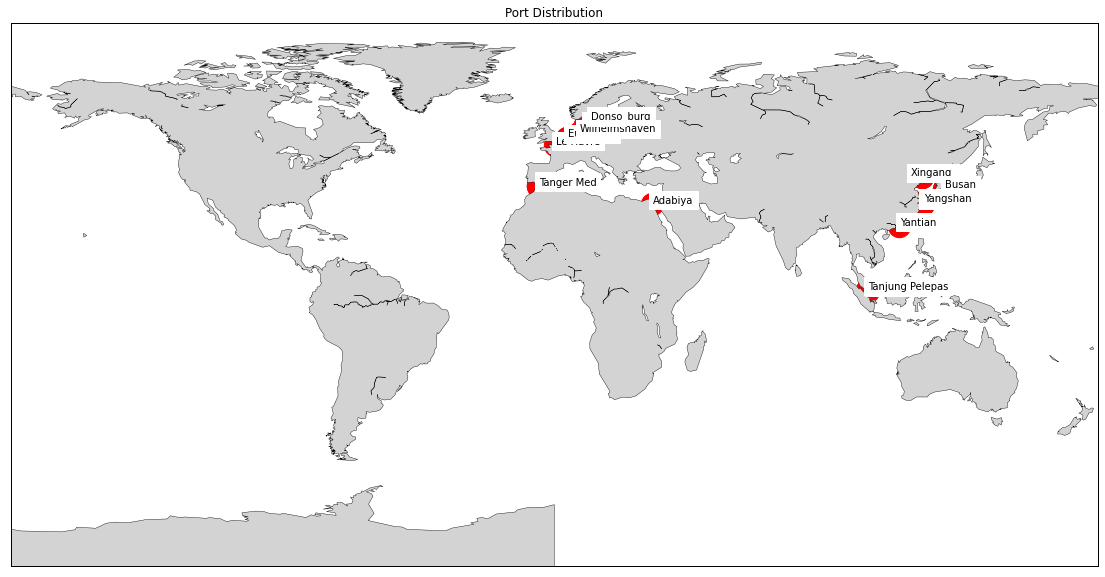

In [5]:
# Port Distribution for a ship
minlon = -179
minlat = -70
maxlon = 179
maxlat = 70
lat0 = (maxlat+minlat)/2
lon0 = (maxlon+minlon)/2
lat1 = (maxlat+minlat)/2-20

fig,ax=plt.subplots(figsize=(20,10))
plt.title('Port Distribution')

m=Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
m.drawmapboundary(fill_color='white')
m.drawcoastlines(color='black', linewidth=0.4)
m.fillcontinents(color='lightgrey',lake_color='white')
m.scatter(maersk_ports_by_imo['lng_to'],maersk_ports_by_imo['lat_to'], s=500, alpha=1.0, c='r')

labels = maersk_ports_by_imo.port_to.values
for label, xpt, ypt in zip(labels, maersk_ports_by_imo.lng_to.values, maersk_ports_by_imo.lat_to.values):
        plt.annotate(label, xy=m(xpt, ypt), xycoords="data", backgroundcolor="w", xytext=(1,1), textcoords='offset points') 

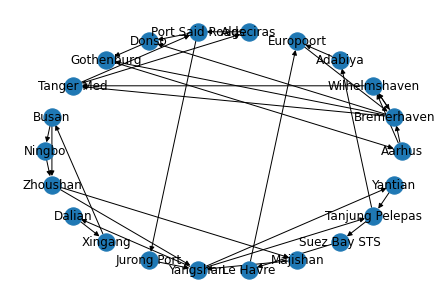

In [65]:
# Network Analysis for a ship - Using MultiDiGraph
trips = (
    maersk_ports_by_imo
    .groupby(["port", "port_to"])
    .count()
    .reset_index()
    .select_columns(
        [
            "port", 
            "port_to", 
            "tripid"
        ]
    )
    .rename_column("tripid", "num_trips")
)

schedule = nx.MultiDiGraph()

schedule = nx.from_pandas_edgelist(trips, source='port', target='port_to',
                                          edge_attr=["num_trips"],
                                          create_using=nx.MultiDiGraph())
nx.draw_circular(schedule, with_labels=True)

In [9]:
# List Nodes in the Schedule
nodes = schedule.nodes()
list(nodes)

['Aarhus',
 'Bremerhaven',
 'Wilhelmshaven',
 'Adabiya',
 'Europoort',
 'Algeciras',
 'Port Said Roads',
 'Donso',
 'Gothenburg',
 'Tanger Med',
 'Busan',
 'Ningbo',
 'Zhoushan',
 'Dalian',
 'Xingang',
 'Jurong Port',
 'Yangshan',
 'Le Havre',
 'Majishan',
 'Suez Bay STS',
 'Tanjung Pelepas',
 'Yantian']

In [10]:
# List Edges in the Schedule
edges = list(schedule.edges())
edges

[('Aarhus', 'Bremerhaven'),
 ('Aarhus', 'Wilhelmshaven'),
 ('Bremerhaven', 'Donso'),
 ('Bremerhaven', 'Gothenburg'),
 ('Bremerhaven', 'Tanger Med'),
 ('Bremerhaven', 'Wilhelmshaven'),
 ('Wilhelmshaven', 'Bremerhaven'),
 ('Wilhelmshaven', 'Tanger Med'),
 ('Adabiya', 'Europoort'),
 ('Europoort', 'Bremerhaven'),
 ('Algeciras', 'Port Said Roads'),
 ('Port Said Roads', 'Donso'),
 ('Port Said Roads', 'Jurong Port'),
 ('Donso', 'Gothenburg'),
 ('Gothenburg', 'Aarhus'),
 ('Tanger Med', 'Algeciras'),
 ('Tanger Med', 'Port Said Roads'),
 ('Busan', 'Ningbo'),
 ('Busan', 'Zhoushan'),
 ('Ningbo', 'Zhoushan'),
 ('Zhoushan', 'Majishan'),
 ('Zhoushan', 'Yangshan'),
 ('Dalian', 'Xingang'),
 ('Xingang', 'Busan'),
 ('Jurong Port', 'Yangshan'),
 ('Yangshan', 'Dalian'),
 ('Yangshan', 'Tanjung Pelepas'),
 ('Yangshan', 'Yantian'),
 ('Le Havre', 'Europoort'),
 ('Majishan', 'Yangshan'),
 ('Suez Bay STS', 'Le Havre'),
 ('Tanjung Pelepas', 'Adabiya'),
 ('Tanjung Pelepas', 'Suez Bay STS'),
 ('Yantian', 'Tanjung P

In [11]:
# List Weights of the Schedule
weights = list(nx.get_edge_attributes(schedule,'weight').values())
weights

[]

In [12]:
# List of Neighbors
sorted(schedule.nodes(), key=lambda x: len(list(schedule.neighbors(x))), reverse = True)

['Bremerhaven',
 'Yangshan',
 'Aarhus',
 'Wilhelmshaven',
 'Port Said Roads',
 'Tanger Med',
 'Busan',
 'Zhoushan',
 'Tanjung Pelepas',
 'Adabiya',
 'Europoort',
 'Algeciras',
 'Donso',
 'Gothenburg',
 'Ningbo',
 'Dalian',
 'Xingang',
 'Jurong Port',
 'Le Havre',
 'Majishan',
 'Suez Bay STS',
 'Yantian']

In [42]:
# List Degree Centrality of each Node in the Schedule
deg_centrality = list(nx.degree_centrality(schedule).values())
deg_centrality
port_rank = dict(nx.degree_centrality(schedule).items())
port_rank
dmax = max(port_rank)
dmax

'Zhoushan'